Домашняя работа по теме "Сегментация и детекция объектов"

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [2]:
train = np.loadtxt('train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28))
test_img = np.resize(test, (test.shape[0], 28, 28))

In [4]:
train_img.shape

(42000, 28, 28)

## Визуализируем исходные данные

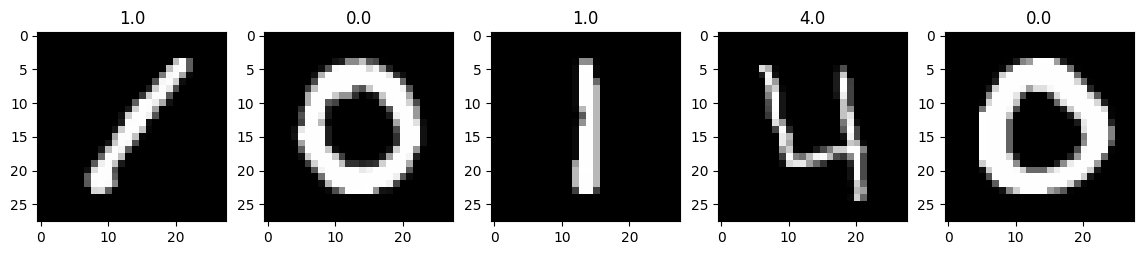

In [5]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Задаем параметры для вычисления дескриптора

In [24]:
winSize = (28,28)
blockSize = (14,14)
blockStride = (14,14)
cellSize = (7,7)
nbins = 9
derivAperture = 1
winSigma = 4.
histogramNormType = 0
L2HysThreshold = 2.0000000000000001e-01
gammaCorrection = 0
nlevels = 64

hog = cv2.HOGDescriptor(winSize,
                        blockSize,
                        blockStride,
                        cellSize,
                        nbins,
                        derivAperture,
                        winSigma,
                        histogramNormType,
                        L2HysThreshold,
                        gammaCorrection,
                        nlevels)

## Вычисляем дескриптор для изображений

In [41]:
train_descriptors = []
for i in range(len(train_img)):
  train_descriptor = hog.compute(np.uint8(train_img[i]))
  train_descriptors.append(train_descriptor)

train_descriptors = np.array(train_descriptors)

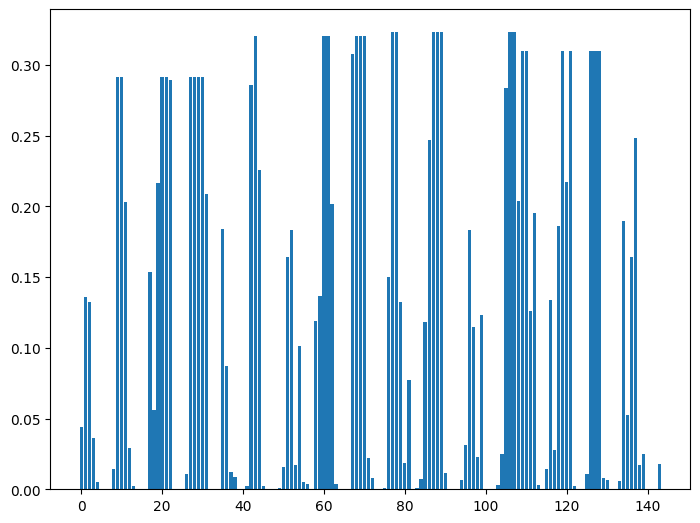

In [46]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(range(len(train_descriptors[1])), train_descriptors[1].reshape(-1))
plt.show()

## Разбиваем выборку на обучение и валидацию

In [47]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_descriptors, test_size=0.2,
    random_state=52)

## Создаем модель для предсказаний

In [48]:
# Используем метод опорных векторов (SVM) для классификации
from sklearn import svm
classifier = svm.SVC(gamma=0.001)
classifier.fit(x_train, y_train)

SVC(gamma=0.001)

In [63]:
# Предсказание на валидационной выборке
pred_test = classifier.predict(x_val)

## Оцениваем качество решения на валидационной выборке

In [64]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_test))

Accuracy: 0.9265476190476191


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_test))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       856
         1.0       0.95      0.97      0.96       916
         2.0       0.92      0.94      0.93       806
         3.0       0.91      0.94      0.92       901
         4.0       0.95      0.92      0.93       827
         5.0       0.94      0.89      0.92       742
         6.0       0.95      0.97      0.96       816
         7.0       0.91      0.89      0.90       884
         8.0       0.91      0.88      0.89       830
         9.0       0.88      0.89      0.88       822

    accuracy                           0.93      8400
   macro avg       0.93      0.93      0.93      8400
weighted avg       0.93      0.93      0.93      8400



In [66]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_test))

[[841   4   0   1   0   1   6   0   3   0]
 [  0 887  14   3   4   0   0   5   3   0]
 [  4   2 754  17   6   0   1   7  14   1]
 [  3   0  11 845   0  13   0   8  17   4]
 [  1  15   5   0 763   0   5   2   2  34]
 [  9   0   1  34   0 660  17   1  18   2]
 [  7   6   1   0   2   7 790   0   3   0]
 [  0   4  17   7  16   0   0 783   5  52]
 [ 22  10  17   7   6  16   8   6 732   6]
 [  6   4   0  14   9   3   1  47  10 728]]


## Предсказания для тестовых данных

In [44]:
test_descriptors = []
for i in range(len(test_img)):
  test_descriptor = hog.compute(np.uint8(test_img[i]))
  test_descriptors.append(test_descriptor)

test_descriptors = np.array(test_descriptors)

In [75]:
predicted = classifier.predict(test_descriptors)

## Визуализируем предсказания

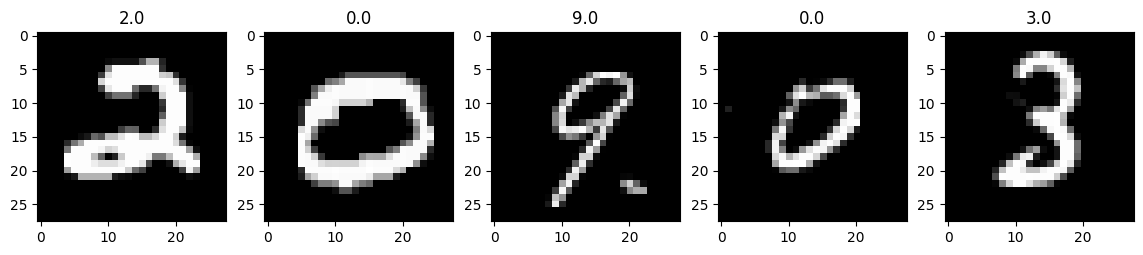

In [76]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % predicted[i - 1]);

## Готовим файл для отправки

In [79]:
with open('submit.csv', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(predicted, 1):
        dst.write('%s,%s\n' % (i, int(p)))

In [80]:
!head submit.csv

ImageId,Label
1,2
2,0
3,9
4,0
5,3
6,7
7,0
8,3
9,0
